In [31]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

5


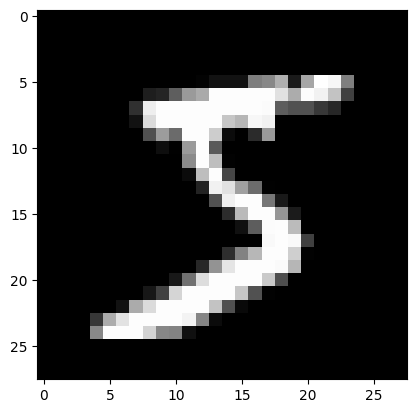

In [32]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = train_data[0].reshape(-1,784).astype(float) / 255 # les x_train sont mis sur 784 colonnes = 28 x 28
y_train = train_data[1]
print(y_train[0]) # les prédictions vont entre 0 et 9 car on prédit un chiffre
plt.imshow(train_data[0][0], cmap='gray')

In [34]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation=None, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#def loss(true, pred):
#    val = 0.
#    for i in range(len(true)):
#        val -= np.log(pred[i, true[i]])
#    return val / len(true)
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


### Question 4.1 

To train using this model, we are going to optimize 26,506 variables.

In [35]:
# untrained model
logits = model(x_train)
np.argmax(logits, 1)[0:100]

array([1, 4, 7, 3, 7, 5, 7, 5, 7, 5, 4, 7, 6, 5, 1, 7, 3, 6, 5, 7, 6, 4,
       7, 3, 3, 2, 7, 5, 6, 7, 1, 4, 5, 5, 4, 3, 7, 3, 3, 7, 5, 4, 7, 7,
       3, 5, 3, 3, 5, 4, 1, 5, 4, 7, 5, 6, 7, 7, 6, 3, 7, 6, 1, 5, 7, 4,
       1, 4, 2, 4, 5, 7, 5, 1, 1, 4, 3, 3, 3, 7, 7, 4, 7, 5, 6, 4, 7, 7,
       0, 7, 7, 5, 7, 5, 1, 1, 7, 7, 1, 7], dtype=int64)

In [36]:
# what we would like to get
y_train[0:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [37]:
## Computing a stochastic gradient

# Source: https://keras.io/guides/writing_a_training_loop_from_scratch/

# Example of gradient computation using automatic differentiation

x_train_batch = x_train[:10]
y_train_batch = y_train[:10]

with tf.GradientTape() as tape:
        # Run the forward pass of the layer.
        # The operations that the layer applies
        # to its inputs are going to be recorded
        # on the GradientTape.
        logits = model(x_train_batch)  # Logits for this minibatch

        # Compute the loss value for this minibatch.
        loss_value = loss(y_train_batch, logits)

# Use the gradient tape to automatically retrieve
# the gradients of the trainable variables with respect to the loss.
grad = tape.gradient(loss_value, model.trainable_weights)

## Updating weights

def update_weights(model, update):
    new_weights = model.trainable_weights.copy()
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] + update[i]
    model.set_weights(new_weights)


## Evaluate model
samples_for_evaluation = np.random.randint(0, 10000, 1000)
logits = model(x_train[samples_for_evaluation])
loss(y_train[samples_for_evaluation], logits).numpy()
    

10.652227

In [38]:
# Stochastic gradient algorithm

# Let us first implement the method with a constant step size 
# We run the gradient method for K iteration so the step size (learnin rate) is as defined in the course

K = 100
a = 1
gamma_k = a / np.sqrt(K)

x_train_batch = x_train[:10]
y_train_batch = y_train[:10]

for k in range(K):
    with tf.GradientTape() as tape:
        # Run the forward pass of the layer.
        # The operations that the layer applies
        # to its inputs are going to be recorded
        # on the GradientTape.
        logits = model(x_train_batch)  # Logits for this minibatch
        

        # Compute the loss value for this minibatch.
        loss_value = loss(y_train_batch, logits)

        # Use the gradient tape to automatically retrieve
        #   the gradients of the trainable variables with respect to the loss.
        grad = tape.gradient(loss_value, model.trainable_weights)
    
    update = [tf.math.scalar_mul(-gamma_k, grad[i]) for i in range(len(grad))]
    update_weights(model, update)

## Evaluate model
samples_for_evaluation = np.random.randint(0, 10000, 1000)
logits = model(x_train[samples_for_evaluation])
loss(y_train[samples_for_evaluation], logits).numpy()

8.448529

In [39]:
loss(y_train[samples_for_evaluation], logits).numpy()

8.448529

In [44]:
## Q5.2
# Stochastic gradient algorithm

# Let us first implement the method with a constant step size 
# We run the gradient method for K iteration so the step size is as defined in the course

def stochastic_gradient_descent(K=1, batch_size=100):
    idx_list = []
    objective_list = []
    
    a = 1
    gamma_k = a / np.sqrt(K) # hyperparameter : pas de la descente

    total_size = x_train.shape[0]
    nb_batch = int(total_size / batch_size) # 600 ici

    idx = 0 # index pour la liste avec les valeurs de la fonction objective (loss)

    # K = nombre d'epoch (combien de fois on parcourt le data set entier)
    for k in range(K):
        # on le fait une fois 
        for i in range(nb_batch):

            # on découpe le dataset en plusieurs batch de plus petites dimensions
            x_train_batch = x_train[i*batch_size:(i+1)*batch_size]
            y_train_batch = y_train[i*batch_size:(i+1)*batch_size]

        
            with tf.GradientTape() as tape:
                # Run the forward pass of the layer.
                # The operations that the layer applies
                # to its inputs are going to be recorded
                # on the GradientTape.
                
                # Rajouter une condition pour ne pas calculer à chaque fois tout ?
                logits = model(x_train_batch)  # Logits for this minibatch
                loss_value = loss(y_train_batch, logits)
                
                    
                
                idx_list.append(idx)
                objective_list.append(loss_value)
                idx += 1
                # Use the gradient tape to automatically retrieve
                #   the gradients of the trainable variables with respect to the loss.
                grad = tape.gradient(loss_value, model.trainable_weights)
            
            # est-ce qu'on fait la bonne update ?
            update = [tf.math.scalar_mul(-gamma_k, grad[j]) for j in range(len(grad))]
            update_weights(model, update)
    
    return idx_list, objective_list


In [45]:
index_list, loss_list = stochastic_gradient_descent(K=1, batch_size=100)

In [11]:
## Evaluate model
samples_for_evaluation = np.random.randint(0, 10000, 1000)
logits = model(x_train[samples_for_evaluation])
loss(y_train[samples_for_evaluation], logits).numpy()

2.3011725

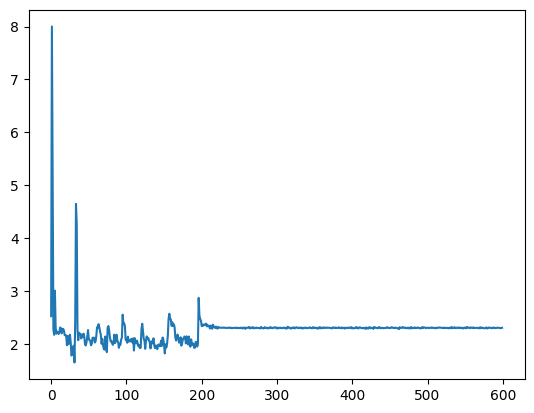

In [12]:
plt.plot(index_list, loss_list)
plt.show()

We remark that the code is executed much faster as we compute less often the loss value. (At least that's what we guess as we don't succed in computing less values)